In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read Dataframe
df= pd.read_csv('../Data/NSF_data_20years.csv')

In [5]:
df.head()

,Unnamed: 0,id,agency,awardeeName,awardeeCity,awardeeStateCode,piFirstName,piLastName,title,date,startDate,expDate,fundsObligatedAmt,abstractText,orgCandidate
0,0,2432754,NSF,XN HEALTH INC.,NEWARK,NJ,Elizabeth,Jaworski,STTR Phase I: Tracheal Phrenic Nerve Stimulat...,07/11/2025,07/15/2025,06/30/2026,274841,The broader/commercial impact of this Small Bu...,Corewell Health
1,1,2505338,NSF,Oregon Health & Science University,PORTLAND,OR,Paul,Tratnyek,Electrochemical Characterization of Redox Proc...,05/22/2025,07/01/2025,06/30/2028,410000,With support from the Environmental Chemical S...,Corewell Health
2,2,2451412,NSF,"ABSTRACTIVE HEALTH, INC.",NEW YORK,NY,Vince,Hartman,SBIR Phase II : A tool to automate a narrative...,07/01/2025,07/01/2025,06/30/2027,1250000,The broader impact/commercial potential of thi...,Corewell Health
3,3,2419342,NSF,"INSU HEALTH DESIGN, INC.",MAYAGUEZ,PR,Mason,Lucich,SBIR Phase II: Insu Health Design: Temperature...,05/15/2025,05/15/2025,04/30/2027,998527,This Small Business Innovation Research (SBIR)...,Corewell Health
4,4,2444410,NSF,University of North Texas Health Science Cente...,FORT WORTH,TX,Austin,Reynolds,Collaborative Research: Genomic and Isotopic A...,04/07/2025,04/15/2025,03/31/2028,63318,Studies of human population genetics can revea...,Corewell Health


### Generate Report

In [10]:
import pandas as pd

class DataFrameReport:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def generate_report(self):
        report = {}
        for col in self.df.columns:
            col_data = self.df[col]

            col_report = {
                "count": col_data.count(),
                "null_count": col_data.isnull().sum(),
                "nunique": col_data.nunique()
            }

            if col_report["nunique"] <= 5:
                col_report["value_counts"] = col_data.value_counts(dropna=False).to_dict()

            report[col] = col_report

        return report

    def to_excel(self, filepath="../Data/report.xlsx"):
        report = self.generate_report()
        rows = []

        for col, col_report in report.items():
            base_row = {
                "Column": col,
                "count": col_report["count"],
                "null_count": col_report["null_count"],
                "nunique": col_report["nunique"]
            }

            # If small uniques, expand them
            if "value_counts" in col_report:
                for val, cnt in col_report["value_counts"].items():
                    row = base_row.copy()
                    row["value"] = val
                    row["value_count"] = cnt
                    rows.append(row)
            else:
                rows.append(base_row)

        df_report = pd.DataFrame(rows)

        # Save to Excel
        with pd.ExcelWriter(filepath, engine="xlsxwriter") as writer:
            df_report.to_excel(writer, index=False, sheet_name="Report")

        return filepath


In [11]:
reporter = DataFrameReport(df)
reporter.to_excel("NHF_data_report.xlsx")

'NHF_data_report.xlsx'

In [13]:
reporter.generate_report()

{'Unnamed: 0': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 1515},
 'id': {'count': np.int64(1515), 'null_count': np.int64(0), 'nunique': 513},
 'agency': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 1,
  'value_counts': {'NSF': 1515}},
 'awardeeName': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 88},
 'awardeeCity': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 75},
 'awardeeStateCode': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 29},
 'piFirstName': {'count': np.int64(1505),
  'null_count': np.int64(10),
  'nunique': 261},
 'piLastName': {'count': np.int64(1505),
  'null_count': np.int64(10),
  'nunique': 320},
 'title': {'count': np.int64(1515), 'null_count': np.int64(0), 'nunique': 483},
 'date': {'count': np.int64(1515), 'null_count': np.int64(0), 'nunique': 465},
 'startDate': {'count': np.int64(1515),
  'null_count': np.int64(0),
  'nunique': 260},
 'expDate': {'cou

In [34]:
def year_chart(df, date):
    df[date] = pd.to_datetime(df[date])
    df["year"] = df[date].dt.year
    year_counts = df.groupby(["year", "orgCandidate"]).size().reset_index(name="count")
    # pivot to wide format: one column per category
    #print(year_counts)
    pivot_df = year_counts.pivot(index="year", columns='orgCandidate', values="count").fillna(0)

    # plot
    plt.figure(figsize=(8,5))
    for col in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[col], marker="o", label=col)

    plt.title("Record Count by Year per Category")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.grid(True)
    plt.legend(title= 'orgCandidate')
    plt.show()


#### date

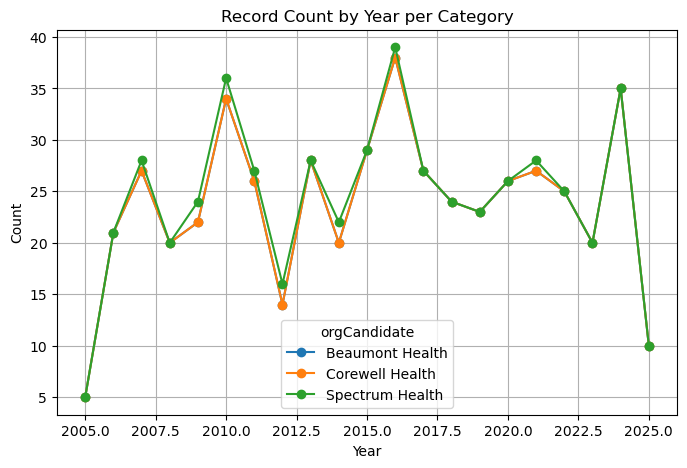

In [35]:
year_chart(df, 'date')

C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date] = pd.to_datetime(df[date])
C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df[date].dt.year


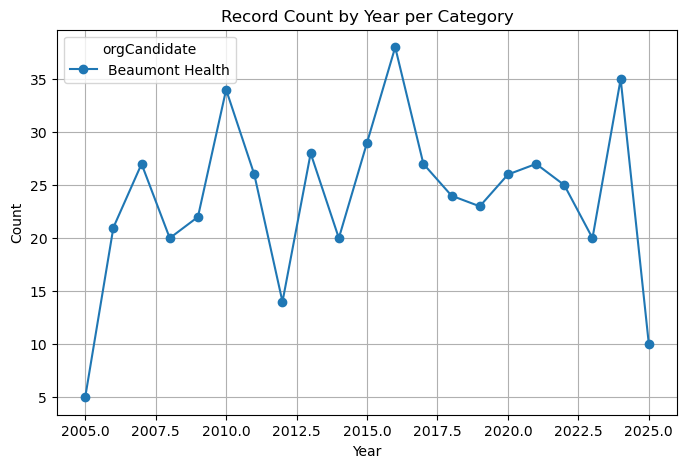

In [36]:
year_chart(df[df['orgCandidate']=='Beaumont Health'], 'date')

#### Start Date

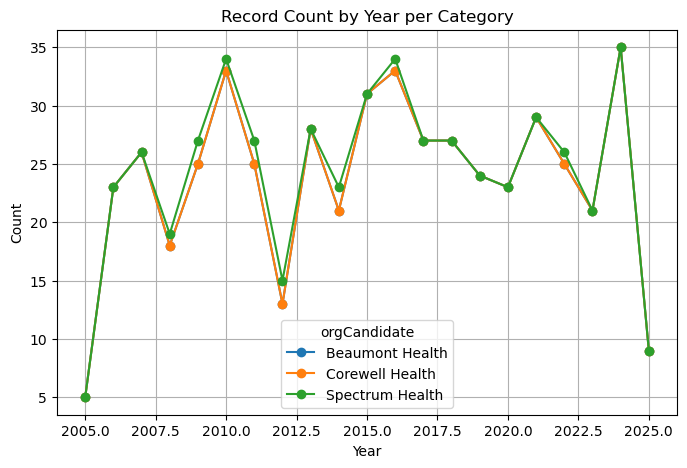

In [37]:
year_chart(df, 'startDate')

C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date] = pd.to_datetime(df[date])
C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df[date].dt.year


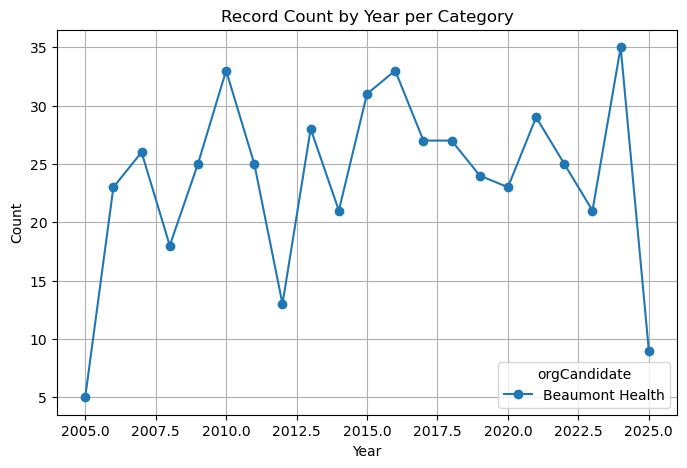

In [38]:
year_chart(df[df['orgCandidate']=='Beaumont Health'], 'startDate')

#### Expiry Date

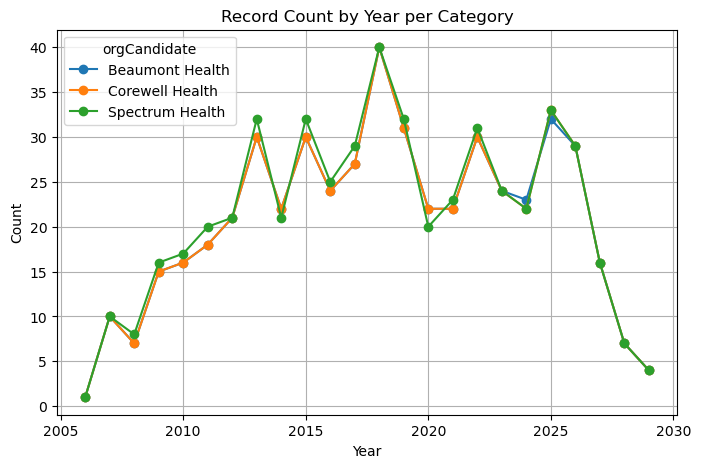

In [39]:
year_chart(df, 'expDate')

C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date] = pd.to_datetime(df[date])
C:\Users\roshn\AppData\Local\Temp\ipykernel_5144\1223180404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df[date].dt.year


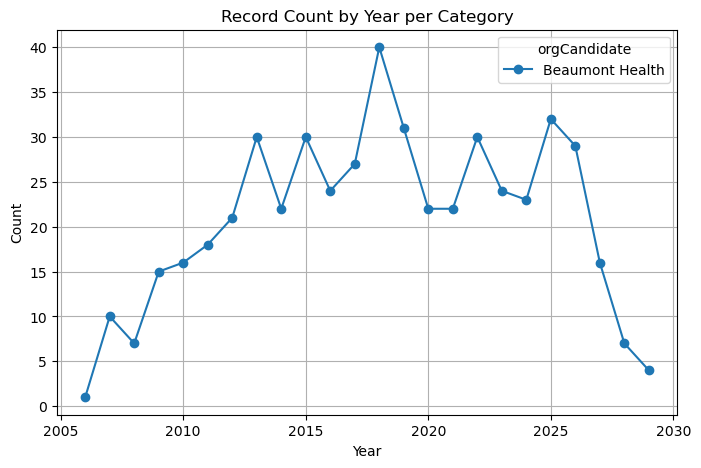

In [40]:
year_chart(df[df['orgCandidate']=='Beaumont Health'], 'expDate')

In [41]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_all_org_counts(years_back=20):
    base = "https://api.nsf.gov/services/v1/awards.json"
    end_date = datetime.today()
    start_date = end_date - timedelta(days=years_back*365)

    s = start_date.strftime("%m/%d/%Y")
    e = end_date.strftime("%m/%d/%Y")
    rpp = 25

    rows = []
    offset = 1
    while True:
        params = {
            "startDateStart": s,
            "startDateEnd": e,
            "rpp": rpp,
            "offset": offset,
            "printFields": "id,awardeeName"
        }
        resp = requests.get(base, params=params, timeout=60)
        resp.raise_for_status()
        data = resp.json()
        awards = (data.get("response") or {}).get("award") or []
        if not awards:
            break

        for a in awards:
            rows.append({
                "id": str(a.get("id") or ""),
                "awardeeName": a.get("awardeeName")
            })

        if len(awards) < rpp:
            break
        offset += rpp

    df = pd.DataFrame(rows)

    # group by org
    counts = (
        df.groupby("awardeeName")
          .size()
          .reset_index(name="count")
          .sort_values("count", ascending=False)
    )

    return counts


In [43]:
org_counts = fetch_all_org_counts(20)
print(org_counts.head(10))

                                            awardeeName  count
782   Regents of the University of Michigan - Ann Arbor    142
70                             Arizona State University    131
382                   Georgia Tech Research Corporation    129
1147                    University of Wisconsin-Madison    123
748             Pennsylvania State Univ University Park    122
761                                   Purdue University    117
1142                           University of Washington    117
1051         University of Illinois at Urbana-Champaign    116
1131                      University of Texas at Austin    112
256                                  Cornell University    111


In [ ]:
org_counts[org_counts['awardeeName'].isin([
    "Corewell Health",
    "Spectrum Health",
    "Beaumont Health"]
)]

,awardeeName,count


In [46]:
org_counts[org_counts['awardeeName'] == "Corewell Health"]

,awardeeName,count


In [48]:
import requests

base = "https://api.nsf.gov/services/v1/awards.json"
params = {"rpp": 1}  # request 1 record only
resp = requests.get(base, params=params, timeout=60)
resp.raise_for_status()
data = resp.json()

# Look at the structure of one award
award = data["response"]["award"]
print(award.keys())

AttributeError: 'list' object has no attribute 'keys'

In [50]:
import requests
from datetime import datetime

base = "https://api.nsf.gov/services/v1/awards.json"

params = {
    "startDateStart": "01/01/1950",
    "startDateEnd": datetime.today().strftime("%m/%d/%Y"),
    "rpp": 1  # only need 1 record
}

resp = requests.get(base, params=params, timeout=60)
resp.raise_for_status()
data = resp.json()

awards = (data.get("response") or {}).get("award") or []
if awards:
    award = awards[0]
    print(award.keys())
    print(award.values())
else:
    print("No awards returned.")


dict_keys(['agency', 'awardeeCity', 'awardeeName', 'awardeeStateCode', 'fundsObligatedAmt', 'id', 'publicAccessMandate', 'date', 'startDate', 'title'])
dict_values(['NSF', 'BALTIMORE', 'University of Maryland Baltimore County', 'MD', '285380', '2549842', '1', '09/02/2025', '09/01/2025', 'High-Resolution Transcranial Ultrasound Neuromodulation at Large Scale'])
